# PCA algorithm

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## Sample Data

In [2]:
X, y = make_blobs(n_samples=100,random_state=19,n_features=10)

## PCA Class 

In [3]:
class PCA:
    def __init__(self,X,k):
        self.X = X
        self.k = k
        self.y = None
    def find_mean(self):
        return X.mean(axis=1)
    def shifting(self):
        mu = self.find_mean()
        A = np.zeros(X.shape)
        for i in range(X.shape[0]):
            A[i] = X[i]-mu[i]
        return A
    def sigma_matrix(self):
        A = self.shifting()
        S = A.dot(A.T)
        return S
    def fit(self):
        S = self.sigma_matrix()
        M = S/X.shape[0]
        eigvals,eigvecs = np.linalg.eig(M)
        self.y = eigvecs[:,:self.k]
    def transform(self):
        return self.y     


In [4]:
model = PCA(X,2)
model.fit()
new_X = model.transform()

In [5]:
print(X.shape)
print(new_X.shape)

(100, 10)
(100, 2)


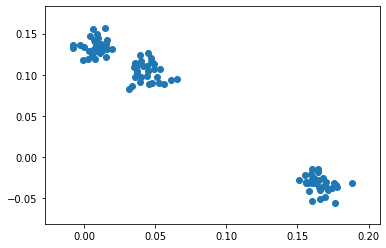

In [7]:
plt.scatter(new_X[:,0],new_X[:,1])